# Convex Optimisation in Finance and Portfolio Management
## Group No. 28
**Members**
- Chirag Jain - EE19BTECH11047
- Sanket Ranade - EE19BTECH11012
- Tanmay Goyal - AI20BTECH11021
- Tanay Yadav - AI20BTECH11026

In [1]:
# importing the required libraries

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Simple Portfolio Maximisation

In [2]:
# This function gives the allocation of the money per investment which is given by the weights.
# We input the expected returns of the investments

def maximize_return(means):
    means = np.array(means)
    
    # gives the allocation of the capital in each investment
    weights = cp.Variable(means.shape[0])

    # returns = allocation in investment * returns of the investments. 
    exp_returns = weights.T @ means

    # maximizing the expected 
    objective = cp.Maximize(exp_returns)
    constraints = [weights >= 0, cp.sum(cp.abs(weights))<=1]

    # formulating the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    print(f'Weights: {weights.value.round(3)}, \nExpected returns: {exp_returns.value.round(5)}')

In [3]:
# expected returns of 5 investments
inv_ret = np.array([0.01, 0.02, 0.03, 0.04, 0.05])

maximize_return(inv_ret)

Weights: [0. 0. 0. 0. 1.], 
Expected returns: 0.05


**Conclusion:**
Here we get 100% allocation of our capital in the Investment #5

# Markowitz Portfolio Maximisation

In [4]:
def maximize_return_markowitz(means, cov, risk, verbose=True):
    
    # assessing the risk 
    if risk == 'low':
        risk_n = 1

    else:
        risk_n = 0

    # working with numpy arrays
    means = np.array(means)
    cov = np.array(cov)

    # gives the allocation of the capital in each investment
    weights = cp.Variable(means.shape[0])

    # returns = allocation in investment * returns of the investments
    exp_returns = weights.T @ means

    # calculating the volatility with the covariance matrix 
    exp_vol = cp.quad_form(weights, cov)

    # applying the risk factor with the volatility calculated
    

    # maximizing the expected returns
    objective = cp.Maximize(exp_returns - risk_n * exp_vol)
    constraints = [weights >= 0, cp.sum(cp.abs(weights)) <= 1]
    
    # formulating the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    w = weights.value.round(3)
    er = exp_returns.value.round(5)
    pv = exp_vol.value.round(3)
    # to print the weights, expected returns and expected variance
    if verbose:
        print(f'Weights: {w}, \nExpected returns: {er}, \nPortfolio Volatility: {pv}')
    return w, er

In [5]:
# expected returns of the investments
means = np.array([0.01, 0.02, -0.03, 0.04, 0.04])

# higher the covariance[i, i], higher the volatility of the investment #i
cov = np.array([[0.02, 0, 0, 0, 0],
                [0, 0.03, 0, 0, 0],
                [0, 0, 0.02, 0, 0],
                [0, 0, 0, 0.9, 0],
                [0, 0, 0, 0, 0.02]])

# risk 
# 'low' for low risk and 'high' for high risk

risk = 'high'
print('--- High Risk Setting ---')
_, _ = maximize_return_markowitz(means, cov, risk)

--- High Risk Setting ---
Weights: [0.  0.  0.  0.5 0.5], 
Expected returns: 0.04, 
Portfolio Volatility: 0.23


In [6]:
# expected returns of the investments
means = np.array([0.01, 0.02, -0.03, 0.04, 0.04])

# higher the covariance[i, i], higher the volatility of the investment #i
cov = np.array([[0.02, 0, 0, 0, 0],
                [0, 0.03, 0, 0, 0],
                [0, 0, 0.02, 0, 0],
                [0, 0, 0, 0.9, 0],
                [0, 0, 0, 0, 0.02]])

# risk 
# 0 for low risk and 1 for high risk

risk = 'low'
print('--- Low Risk Setting ---')
_, _ = maximize_return_markowitz(means, cov, risk)

--- Low Risk Setting ---
Weights: [ 0.025  0.183 -0.     0.017  0.775], 
Expected returns: 0.03559, 
Portfolio Volatility: 0.013


### Plot for Expected returns vs Volatility of the Investment #5

In [7]:
# expected returns of the investments
means = np.array([0.01, 0.02, -0.03, 0.04, 0.04])

# higher the covariance[i, i], higher the volatility of the investment #i
cov = np.array([[0.02, 0, 0, 0, 0],
                [0, 0.03, 0, 0, 0],
                [0, 0, 0.02, 0, 0],
                [0, 0, 0, 0.7, 0],
                [0, 0, 0, 0, 0.02]])

# 10 covariance values from 0.02 to 0.09
inv5_covs = np.linspace(0.02, 0.09, 10)
returns = []
w_allocated = []
for i in range(10):
    cov[4, 4] = inv5_covs[i]
    w_all, ret = maximize_return_markowitz(means, cov, 'low', verbose=False)
    returns.append(ret)
    w_allocated.append(w_all)

w_allocated = np.array(w_allocated)

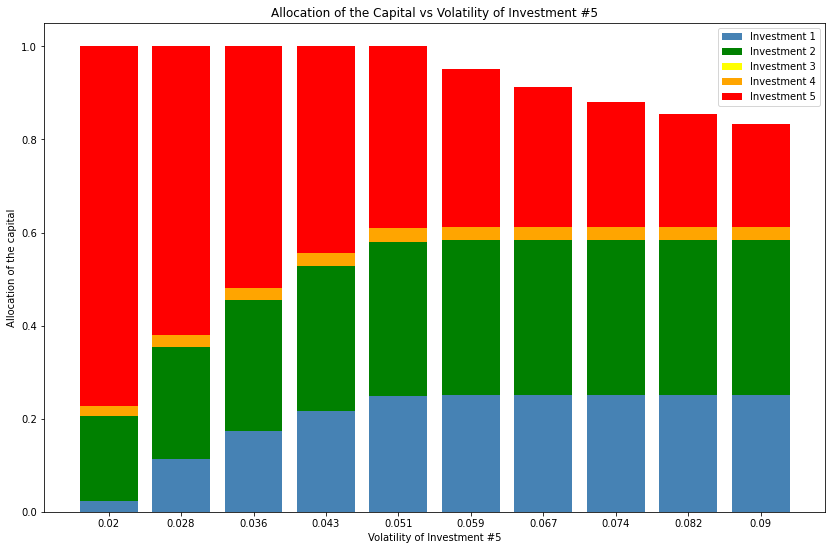

In [8]:
# creating a segmented bar plot for allocation of the capital vs volatility of the investment #5

ticks = np.arange(0, 10)
plt.figure(figsize=(14, 9))
plt.title('Allocation of the Capital vs Volatility of Investment #5')
plt.bar(ticks, w_allocated[:, 0], color='steelblue', label='Investment 1')
plt.bar(ticks, w_allocated[:, 1], bottom=w_allocated[:, 0], color='green', label='Investment 2')
plt.bar(ticks, w_allocated[:, 2], bottom=w_allocated[:, 1]+w_allocated[:, 0], color='yellow', 
        label='Investment 3')
plt.bar(ticks, w_allocated[:, 3], bottom=w_allocated[:, 2]+w_allocated[:, 1]+w_allocated[:, 0], 
        color='orange', label='Investment 4')
plt.bar(ticks, w_allocated[:, 4], bottom=w_allocated[:, 3]+w_allocated[:, 2]+w_allocated[:, 1]+w_allocated[:, 0], 
        color='red', label='Investment 5')
plt.xlabel('Volatility of Investment #5')
plt.ylabel('Allocation of the capital')
plt.xticks(ticks=ticks, labels=inv5_covs.round(3))
plt.legend()
plt.show()

Low Risk Setting


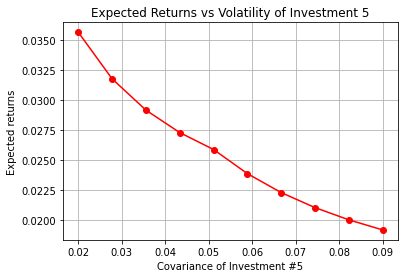

In [9]:
# plotting the graphs
print('Low Risk Setting')
plt.title('Expected Returns vs Volatility of Investment 5')
plt.plot(inv5_covs, returns, 'r-o')
plt.xlabel('Covariance of Investment #5')
plt.ylabel('Expected returns')
plt.grid(True)
plt.show()

**Analysis**

1. Stock 4 and 5 have the same expected return at the current time. So investing in both to maximize our returns makes sense.
2. The volatility of the stock 4 is 0.9 and the volatility of the stock 5 is 0.02.
3. According to the risk factor selected in the Markowitz's Portfolio Management, We have options of carefully investing in each of the 2 investments.
4. High risk selection: The investment was divided among the stocks 4 and 5 equally, giving the overall returns as 4% (0.04).
5. Low risk selection: The investment was divided among the stocks 4 and 5 as: Stock 4: 1.7% and Stock 5: 77.5% and the rest in the Stocks 1 and 2, giving the overall returns as 3.6% (0.036).

# 